<a href="https://colab.research.google.com/github/bekatan/cw4/blob/main/CNNCIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
def transform(data):
  X = data[b'data'].reshape((len(data[b'data']), 3, 32, 32)).transpose((0,2,3,1))
  Y = np.array(data[b'fine_labels']).flatten()
  X = X/255
  return X, Y

In [ ]:
# train_dataset = unpickle('/content/drive/MyDrive/content/train')
# test_dataset = unpickle('/content/drive/MyDrive/content/test')

# X_train, Y_train = transform(train_dataset)
# X_test, Y_test = transform(test_dataset)

# X_trains = []
# Y_trains = []

# for i in range(1,11):
#   X_trains.append(X_train[:1000*i])
#   Y_trains.append(Y_train[:1000*i])
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# X_val = X_train[10000:20000]
X_train = X_train[:20000]

# Y_val = Y_train[10000:20000]
Y_train = Y_train[:20000]

#print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (2, 2), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (2, 2), activation='relu' , padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (2, 2), activation='relu' , padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(100, activation='softmax')(x)

In [ ]:
# Compile
models = []
trained = []

for i in range(10):
	model = Model(i, x)
	model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',	metrics=['accuracy'])
	models.append(model)

ValueError: ignored

In [ ]:
import time

for i in range(10):
	start = time.time()
	trained.append(models[i].fit(
	X_trains[i], Y_train[i], validation_data=(X_test, Y_test), epochs=20))
	print("Training time: ", time.time() - start)

In [ ]:
model = Model(i, x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',	metrics=['accuracy'])

In [ ]:
import time

start = time.time()
r = model.fit(
X_train, Y_train, validation_data=(X_test, Y_test), epochs=20)
print("Training time: ", time.time() - start)

Epoch 1/20
625/625 [==============================] - 16s 8ms/step - loss: 1.6283 - accuracy: 0.4503 - val_loss: 1.3032 - val_accuracy: 0.5271
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 1.1496 - accuracy: 0.5884 - val_loss: 1.2354 - val_accuracy: 0.5688
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9726 - accuracy: 0.6546 - val_loss: 0.9741 - val_accuracy: 0.6534
Epoch 4/20
625/625 [==============================] - 5s 7ms/step - loss: 0.8428 - accuracy: 0.7016 - val_loss: 0.9276 - val_accuracy: 0.6797
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.7455 - accuracy: 0.7366 - val_loss: 0.8729 - val_accuracy: 0.6943
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6499 - accuracy: 0.7710 - val_loss: 0.9711 - val_accuracy: 0.6842
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.5564 - accuracy: 0.8030 - val_loss: 0.8821 - val_accuracy: 0.7088
Epoch

In [ ]:
orig_accuracy = r.history['accuracy']
orig_test_acc = r.history['val_accuracy']

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(X_test, Y_test),
			steps_per_epoch=steps_per_epoch, epochs=20)


Epoch 1/20
625/625 [==============================] - 14s 21ms/step - loss: 2.6089 - accuracy: 0.3733 - val_loss: 2.6793 - val_accuracy: 0.3498
Epoch 2/20
625/625 [==============================] - 13s 21ms/step - loss: 2.2430 - accuracy: 0.4271 - val_loss: 2.5031 - val_accuracy: 0.3833
Epoch 3/20
625/625 [==============================] - 13s 20ms/step - loss: 2.0686 - accuracy: 0.4577 - val_loss: 2.6049 - val_accuracy: 0.3860
Epoch 4/20
625/625 [==============================] - 13s 21ms/step - loss: 1.9445 - accuracy: 0.4814 - val_loss: 2.3572 - val_accuracy: 0.4155
Epoch 5/20
625/625 [==============================] - 13s 21ms/step - loss: 1.8397 - accuracy: 0.5034 - val_loss: 2.3797 - val_accuracy: 0.4054
Epoch 6/20
625/625 [==============================] - 13s 21ms/step - loss: 1.7651 - accuracy: 0.5220 - val_loss: 2.4753 - val_accuracy: 0.4117
Epoch 7/20
625/625 [==============================] - 13s 20ms/step - loss: 1.6978 - accuracy: 0.5359 - val_loss: 2.3913 - val_accuracy:

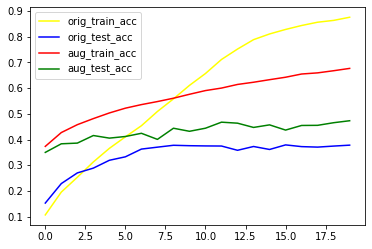

In [ ]:
# Plot accuracy per iteration
plt.plot(orig_accuracy, label='orig_train_acc', color='yellow')
plt.plot(orig_test_acc, label='orig_test_acc', color='blue')
plt.plot(r.history['accuracy'], label='aug_train_acc', color='red')
plt.plot(r.history['val_accuracy'], label='aug_test_acc', color='green')
plt.legend()


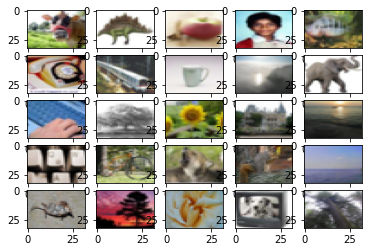

In [ ]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(X_train[k], aspect='auto')
		k += 1

plt.show()


In [ ]:
model.evaluate(x = X_test, y = Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.3002 - accuracy: 0.4731


[2.30016827583313, 0.4731000065803528]